# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [9]:
medical.shape

(1338, 8)

In [10]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

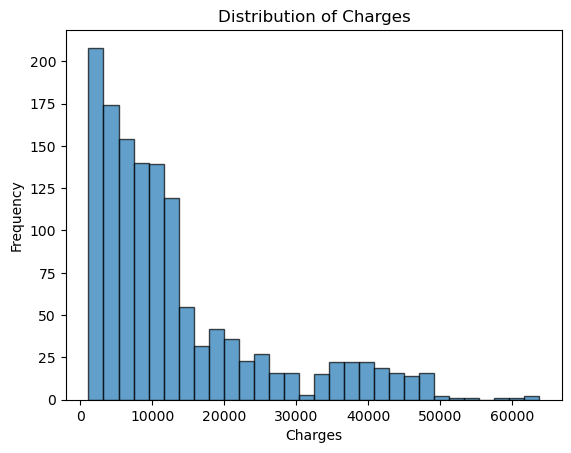

In [13]:
plt.hist(medical.charges, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [14]:
np.mean(medical.charges)

13270.422265141257

In [15]:
np.std(medical.charges)

12105.484975561605

The histogram shows that charges are right-skewed (as is often the case for medical expenses), the mean is disproportionately affected by extreme values (e.g., a few patients with very high charges).

Outliers in charges (extremely high medical costs) inflated both the mean and the standard deviation, making them less representative of the central tendency and spread for the majority of the data.

For skewed data, the median is a more robust measure of central tendency because it is not influenced by extreme values.
For highly skewed data, other measures like the interquartile range (IQR) might provide a better sense of variability.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In order to address the administrator’s concern, it’s essential to determine whether the observed sample of charges provides reliable evidence about the hospital's overall average charge.

The dataset is assumed to represent a random sample of all hospital charges.
This assumption ensures that the sample is unbiased and reflective of the overall population.

Even if the distribution of charges is not normal, the sampling distribution of the sample mean will approximate a normal distribution as long as the sample size  is sufficiently large.
With 𝑛 ≥ 30 the CLT ensures that the sample mean can be treated as normally distributed.

Using the sample mean and standard deviation, we can estimate the population mean and assess whether it has likely fallen below the threshold of 12,000.

The goal is to test whether the population mean is less than 12,000. This calls for a one-sample, one-tailed t-test.

The sample size is moderate and the population standard deviation is unknown. We rely on the sample standard deviation making the 
t-test more appropriate than a Z-test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [24]:
# Parameters
mu_0 = 12000  # Hypothesized mean
sample_mean = np.mean(medical.charges)
sample_std = np.std(medical.charges, ddof=1)
n = len(medical.charges)
df = n - 1

# Calculate Standard Error (SE)
standard_error = sample_std / np.sqrt(n)

# Test statistic
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Critical value
alpha = 0.05
t_critical = t.ppf(alpha, df)

# p-value
p_value = t.cdf(t_statistic, df)

margin_of_error = t_critical * standard_error

# Confidence Interval
confidence_interval = (
    sample_mean - margin_of_error,
    sample_mean + margin_of_error
)
print(f"t-statistic: {t_statistic}")
print(f"Critical t-value: {t_critical}")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"p-value: {p_value}")

t-statistic: 3.837351719658534
Critical t-value: -1.6459941145571324
95% Confidence Interval: (13815.357346466282, 12725.48718381623)
p-value: 0.9999349141739535


The t-statistic is 3.837, which is greater than the critical t-value (−1.646).
This indicates that the sample mean is significantly greater than the hypothesized value of 12,000.

The p-value is 0.9999, which is much greater than the significance level (𝛼=0.05).
Since, 𝑡-statistic > 𝑡-critical and 𝑝 > 𝛼, we fail to reject the null hypothesis (𝐻o: μ≥12,000).

The 95% Confidence Interval is: (12725.49, 13815.36)
This interval means that one can be 95% confident that the true population mean of charges lies somewhere between 12,725.49 and 13,815.36.

The data provides no evidence to suggest that the hospital's average charges have fallen below the threshold of 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

We're assuming equal variances between the two groups (homoscedasticity assumption).

In order to test whether people with insurance are charged differently compared to those without, we need to conduct a two-sample hypothesis test.

Null Hypothesis (𝐻o): The mean charges for people with insurance and those without insurance are equal.

Alternative Hypothesis (Ha): The mean charges for people with insurance and those without insurance are not equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [32]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [33]:
charges_with_insurance = medical.query('insuranceclaim == 1')['charges']
charges_without_insurance = medical.query('insuranceclaim == 0')['charges']

In [34]:
# Group statistics
n0 = len(charges_with_insurance)
n1 = len(charges_without_insurance)

mean0 = np.mean(charges_with_insurance)
mean1 = np.mean(charges_without_insurance)

std0 = np.std(charges_with_insurance, ddof=1)
std1 = np.std(charges_without_insurance, ddof=1)

# Pooled standard deviation
sp = np.sqrt(((n0 - 1) * std0**2 + (n1 - 1) * std1**2) / (n0 + n1 - 2))

# Test statistic
t_statistic = (mean0 - mean1) / (sp * np.sqrt(1 / n0 + 1 / n1))

# Degrees of freedom
df = n0 + n1 - 2

# Two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Perform t-test using scipy
t_stat_scipy, p_value_scipy = ttest_ind(charges_with_insurance, charges_without_insurance, equal_var=True)

# Results
t_statistic, p_value, t_stat_scipy, p_value_scipy

(11.893299030876715, 0.0, 11.893299030876712, 4.461230231620717e-31)

We got the same resutls using the appropriate function from scipy.stats and the manual approach.

A t-statistic this large suggests a very significant difference between the two groups' means. The higher the absolute value of the t-statistic, the stronger the evidence against the null hypothesis.

The p-value of 0.0 (or more precisely, 4.46e−31) is extremely small, much smaller than the standard significance level of 0.05.

This indicates that the probability of observing such a large difference (or a more extreme difference) between the means under the null hypothes (that the means are the same) is virtually zero.

We reject the null hypothesis because the p-value is very small, providing strong evidence that there is a statistically significant difference between the average charges of patients with insurance and those without insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

scipy.stats doesn’t provide a dedicated function like ttest_ind() for a z-test. This is because the z-test generally applies to situations where one is dealing with known population parameters or large sample sizes.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test